baseroot environment from anaconda

In [1]:
from osgeo import gdal
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from osgeo import gdal_array
import glob
import geopandas as gpd
import rioxarray
import os
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist 
import rasterstats
import seaborn as sns
import scipy
import fiona
import shapely

# Read in Georeferenced Shapefile as a GeoPandas DataFrame

epsg:32614


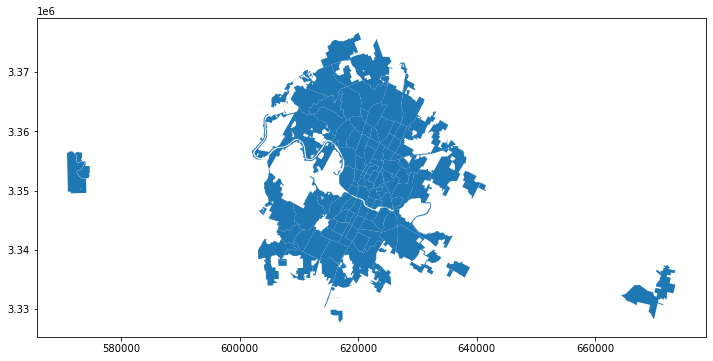

In [2]:
study_area_orig = gpd.read_file(r'C:\Users\molly\Project + Thesis Stuff\Neighborhoods\STUDY_AREA.shp')
study_area = study_area_orig.drop(['layer','path', 'fid','target_fid'], axis=1)
#type(study_area.geometry)
#study_area.geometry
print(study_area.crs)



study_area.plot(figsize=(12,10))
plt.savefig('study_area png')


#  

# Read In All Raster Images, Plot Surface Temperature for the Entire Image

In [3]:
def surf_temp_plots (filename, year):
    #read in raster 
    images = rasterio.open(os.path.join(r'C:\Users\molly\Project + Thesis Stuff\Final Images', filename), mode = 'r')
    #show(img_2020)

    #plot raster and shapefile together
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4)) 
    show(images, ax = ax1, title = 'Surface Temperature '+ year)
    study_area.plot(ax=ax1, facecolor = 'None', edgecolor = 'k')
    


    show_hist(images, title = 'Histogram '+ year, label = 'temperature',ax = ax2, facecolor = 'blue')
    plt.xlabel('Surface Temp (C)')
    
    

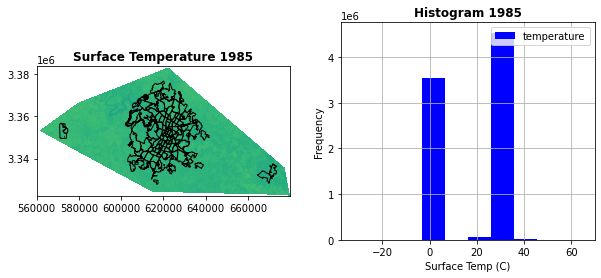

In [4]:
surf_temp_plots('1985_New_Clipped.TIF', '1985')
plt.savefig('surface 1985')

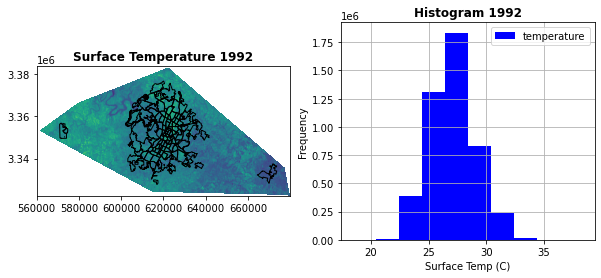

In [5]:
surf_temp_plots('1992_New_Clipped.TIF', '1992')
plt.savefig('surface 1992')

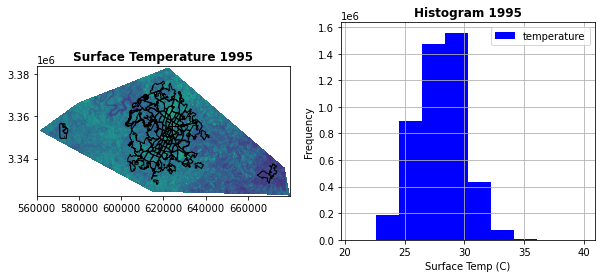

In [6]:
surf_temp_plots('1995_New_Clipped.TIF', '1995')
plt.savefig('surface 1995')

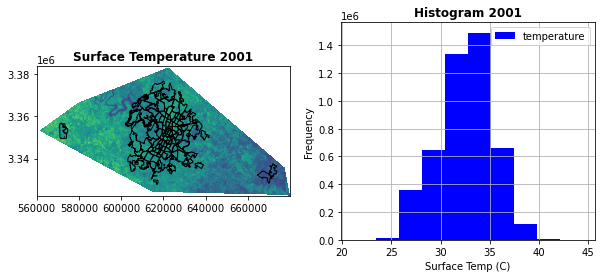

In [7]:
surf_temp_plots('2001_New_Clipped.TIF', '2001')
plt.savefig('surface 2001')

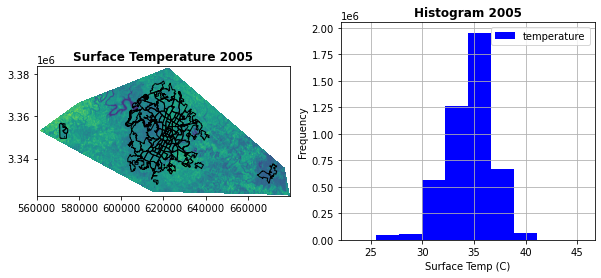

In [8]:
surf_temp_plots('2005_New_Clipped.TIF', '2005')
plt.savefig('surface 2005')

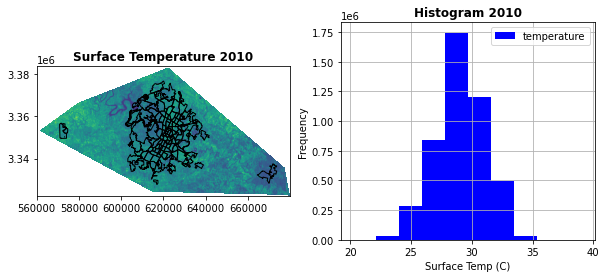

In [9]:
surf_temp_plots('2010_New_Clipped.TIF', '2010')
plt.savefig('surface 2010')

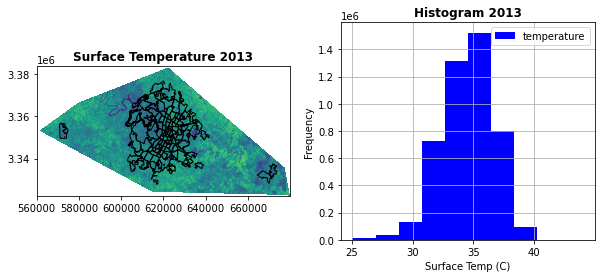

In [10]:
surf_temp_plots('2013_New_Clipped.TIF', '2013')
plt.savefig('surface 2013')

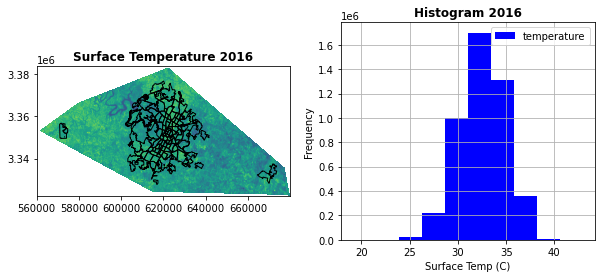

In [11]:
surf_temp_plots('2016_New_Clipped.TIF', '2016')
plt.savefig('surface 2016')

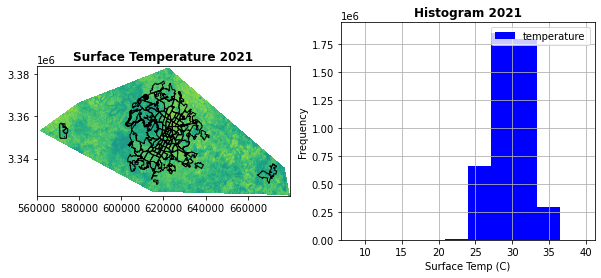

In [12]:
surf_temp_plots('2021_New_Clipped.TIF', '2021')
plt.savefig('surface 2021')

#  Zonal Statistics

In [13]:
def zonal_stats(filename):
    img = rasterio.open(os.path.join(r'C:\Users\molly\Project + Thesis Stuff\Final Images', filename), mode = 'r')
    #assign raster values to a numpy np array
    img_array = img.read(1)
    #type(img_array) test that it is a numpy array

    affine = img.transform #when using the rasterio library will need these variables

    #calculate zonal statistics in neighborhoods
    avgtemp = rasterstats.zonal_stats(study_area, img_array, 
                                           affine = affine, stats = ['mean'], 
                                           geojson_out = True, nodata= 0.0)

    #extracting average temperature from the above list
    avg_temp = []
    i = 0

    while i < len(avgtemp):
        avg_temp.append(avgtemp[i]['properties'])
        i = i+1



    #transfering the info from the list to a pandas datafram
    avg_temp_df = pd.DataFrame(avg_temp)
    return avg_temp_df

# Store Zonal Stats Results Data Into Pandas Dataframes

call function

In [14]:
zonal_stats('1985_New_Clipped.TIF')
zonal_stats('1992_New_Clipped.TIF')
zonal_stats('1995_New_Clipped.TIF')
zonal_stats('2001_New_Clipped.TIF')
zonal_stats('2005_New_Clipped.TIF')
zonal_stats('2010_New_Clipped.TIF')
zonal_stats('2013_New_Clipped.TIF')
zonal_stats('2016_New_Clipped.TIF')
zonal_stats('2021_New_Clipped.TIF')

OBJECTID    Shape_Area    Shape_Le_1       neighname     shape_le_2  \
0        28.0  2.661992e+07  47604.137336      BASTROP SP            NaN   
1        73.0  2.125357e+07  37259.039600  PERDERNALES SP            NaN   
2         NaN  2.416802e+08           NaN   ANDERSON MILL  154458.205390   
3         NaN  6.643628e+07           NaN    WINDSOR PARK   40527.378654   
4         NaN  1.381473e+07           NaN          DAWSON   17697.924998   
..        ...           ...           ...             ...            ...   
100       NaN  2.619762e+07           NaN      SWEETBRIAR   20913.483985   
101       NaN  1.243234e+08           NaN       SPICEWOOD   93083.853837   
102       NaN  3.469975e+07           NaN   WINDSOR HILLS   24789.653502   
103       NaN  1.786977e+08           NaN     ROGERS HILL  163913.176470   
104       NaN  2.212443e+08           NaN   EAST OAK HILL   78662.164888   

        shape_leng   sqmiles       mean  
0              NaN       NaN  27.572217  
1              NaN       NaN  29.205809  
2    154458.205390  8.669086  29.792214  
3     40527.378654  2.383074  32.948478  
4     17697.924998  0.495535  31.440545  
..             ...       ...        ...  
100   20913.483985  0.939710  32.198073  
101   93083.853837  4.459488  26.267552  
102   24789.653502  1.244682  32.660162  
103  163913.176470  6.409898  30.476471  
104   78662.164888  7.936046  29.267498  

[105 rows x 8 columns]

Store the info in pd.df

In [15]:
df_1985 = zonal_stats('1985_New_Clipped.TIF') 
df_1992 = zonal_stats('1992_New_Clipped.TIF')
df_1995 = zonal_stats('1995_New_Clipped.TIF')
df_2001 = zonal_stats('2001_New_Clipped.TIF')
df_2005 = zonal_stats('2005_New_Clipped.TIF')
df_2010 = zonal_stats('2010_New_Clipped.TIF')
df_2013 = zonal_stats('2013_New_Clipped.TIF')
df_2016 = zonal_stats('2016_New_Clipped.TIF')
df_2021 = zonal_stats('2021_New_Clipped.TIF')

# Extract Mean Temperatures, Add Data to Column Study Area Dataframe 

In [16]:
study_area['1985']= df_1985['mean']
study_area['1992']= df_1992['mean']
study_area['1995']= df_1995['mean']
study_area['2001']= df_2001['mean']
study_area['1995']= df_1995['mean']
study_area['2005']= df_2005['mean']
study_area['2010']= df_2010['mean']
study_area['2013']= df_2013['mean']
study_area['2016']= df_2016['mean']
study_area['2021']= df_2021['mean']

In [17]:
#study_area

Create a function for the cholorpleth map

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 
plt.title('Temp Avg by Neighborhood 2020')
avg_temp2020_df.plot(x = 'neighname', y = 'mean', kind = 'hist', ax = ax1)

In [18]:
def show_temp (filename, year):
    fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
    study_area.plot(filename,scheme='Quantiles', ax=ax, legend=True, cmap='OrRd',
                   edgecolor='k')
    #study_area.plot(filename,x = 'neighname', y = 'year', kind = 'hist', ax = ax2)
    plt.title(year + ' Austin, TX Heat Map in C')
    

    

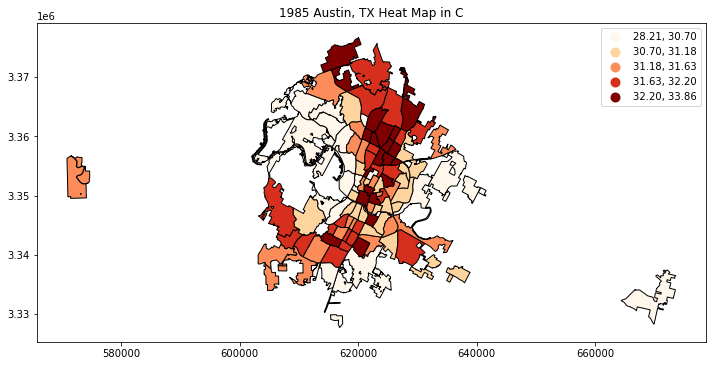

In [19]:
show_temp(study_area['1985'], '1985')
plt.savefig('choropleth_1985')

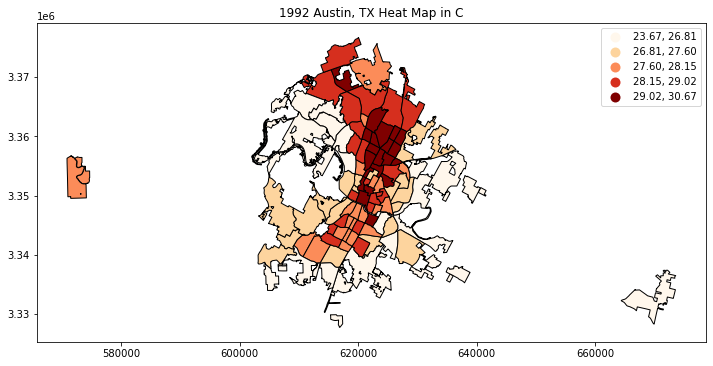

In [20]:
show_temp(study_area['1992'], '1992')
plt.savefig('choropleth_1992')

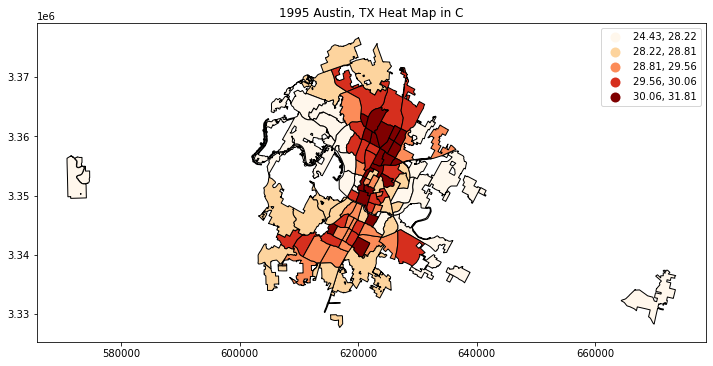

In [21]:
show_temp(study_area['1995'], '1995')
plt.savefig('choropleth_1995')

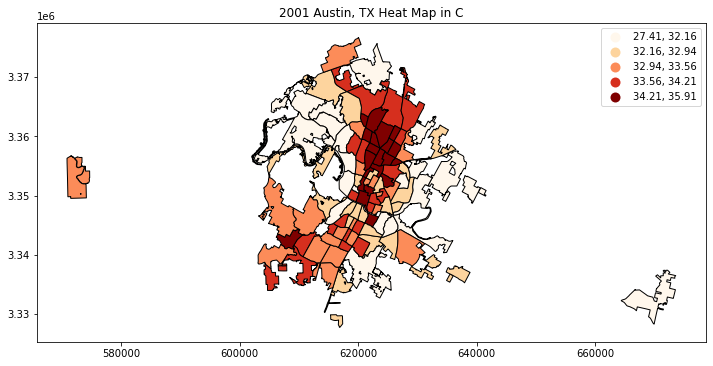

In [22]:
show_temp(study_area['2001'], '2001')
plt.savefig('choropleth_2001')

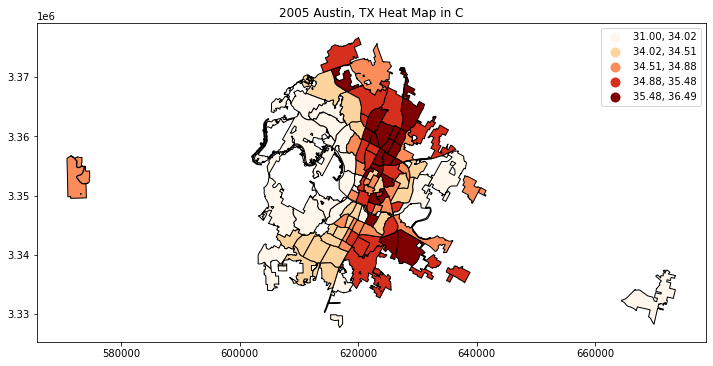

In [23]:
show_temp(study_area['2005'], '2005')
plt.savefig('choropleth_2005')

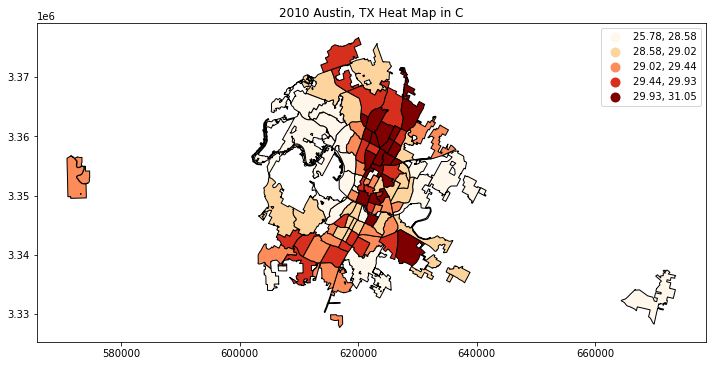

In [24]:
show_temp(study_area['2010'], '2010')
plt.savefig('choropleth_2010')

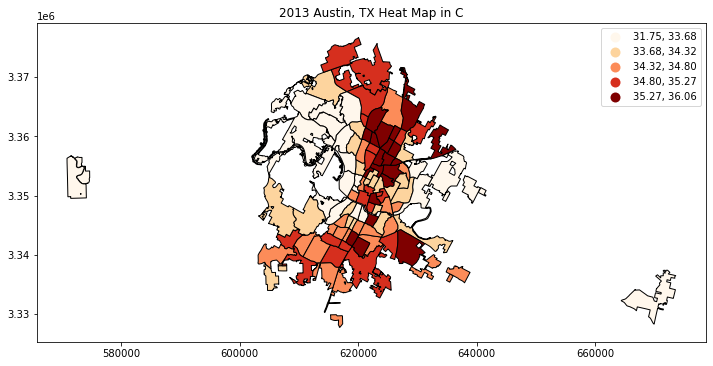

In [25]:
show_temp(study_area['2013'], '2013')
plt.savefig('choropleth_2013')

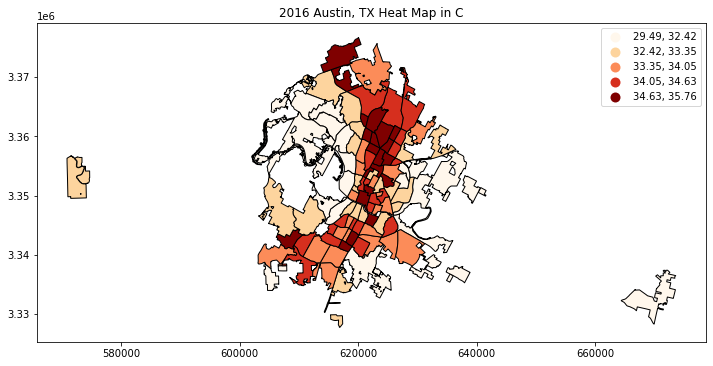

In [26]:
show_temp(study_area['2016'], '2016')
plt.savefig('choropleth_2016')

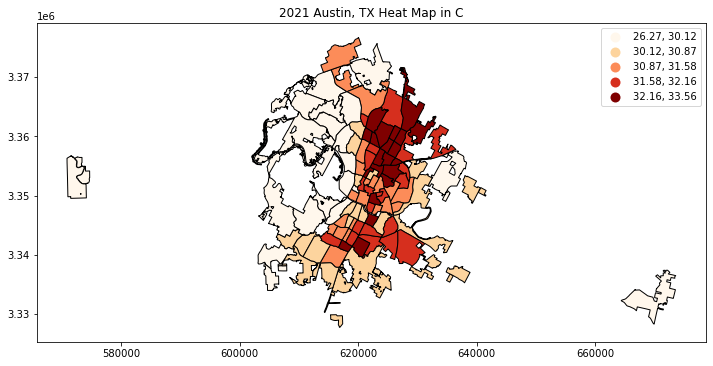

In [27]:
show_temp(study_area['2021'], '2021')
plt.savefig('choropleth_2021')

# # would also like to add a histogram of count to the right of this with something like this code

sns.histplot(df_2021['mean'], ax = ax1) 

# Plot Average Temperature Over Time as a Heatmap

In [28]:
study_area[['neighname', '1985','1992','1995','2001',
          '2005','2010', '2013', '2016','2021']]

neighname       1985       1992       1995       2001       2005  \
0        BASTROP SP  28.213831  23.666272  24.434865  27.409716  30.999106   
1    PERDERNALES SP  31.472377  27.816726  27.023120  33.121807  34.537596   
2     ANDERSON MILL  31.250135  28.321201  28.561188  32.677365  34.336219   
3      WINDSOR PARK  31.933418  28.982036  29.727048  34.106901  35.434557   
4            DAWSON  31.493008  28.103060  29.246716  33.426665  34.540346   
..              ...        ...        ...        ...        ...        ...   
100      SWEETBRIAR  31.920045  27.860517  29.392729  33.565211  34.835533   
101       SPICEWOOD  29.592218  26.465475  27.023375  30.379412  32.532114   
102   WINDSOR HILLS  32.045110  29.060608  30.099830  33.864130  35.570145   
103     ROGERS HILL  29.896094  26.344890  27.413477  31.499345  33.972384   
104   EAST OAK HILL  31.168023  26.881389  28.657891  33.110946  33.622996   

          2010       2013       2016       2021  
0    25.782126  32.446626  31.585197  27.572217  
1    29.223768  32.375722  32.481762  29.205809  
2    28.720961  34.010055  33.174360  29.792214  
3    29.798041  35.321729  33.912015  32.948478  
4    28.903227  34.272502  34.078849  31.440545  
..         ...        ...        ...        ...  
100  29.576223  35.259879  34.702859  32.198073  
101  26.734018  31.751130  30.141637  26.267552  
102  29.765501  34.947472  34.289949  32.660162  
103  28.551814  33.546513  31.402681  30.476471  
104  28.801837  33.691015  32.974993  29.267498  

[105 rows x 10 columns]

Text(0.5, 1.0, 'Temperature Change Over Time by Neighborhood')

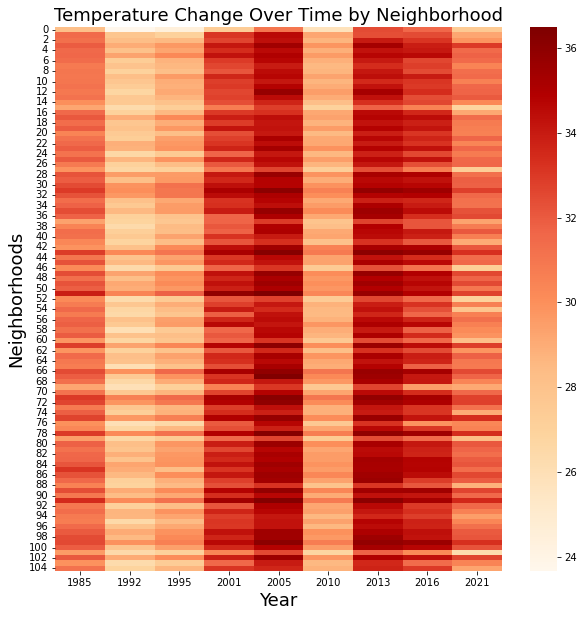

In [29]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(study_area[[ '1985','1992','1995','2001',
          '2005','2010', '2013', '2016','2021']], cmap='OrRd',)

ax.set_ylabel('Neighborhoods', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
plt.title('Temperature Change Over Time by Neighborhood', fontsize=18)

# **account for what years were la nina or el nino

"El Niño: The warm water (red) penetrating eastward in the Spring of 1987 (at the top of the plot) was the El Niño in 1986-1987.  The warm water penetrating towards the east in the northern hemisphere spring of 1992 is the 1991-1992 El Niño.  The El Niño events of 1997-1998 and 2015-2016 El Niño (at bottom of the plot) were unusually strong. "

La Niña, where the water is cooler than normal, is indicated by blue colors.  Notice the very cool water (blue) in 1988-1989, near the top of the plot, which was a very strong La Niña.  Notice the cool water in 1995, 1998, 2007 and 2011, which were La Niña years.  La Niña events occur after some (but not all) El Niños.

source: https://www.pmel.noaa.gov/elnino/what-is-la-nina#:~:text=El%20Ni%C3%B1o%2C%20where%20the%20water,%2D1998%20and%202015%2D2016.
&text=Notice%20the%20cool%20water%20in,which%20were%20La%20Ni%C3%B1a%20years.

<class 'matplotlib.axes._subplots.AxesSubplot'>


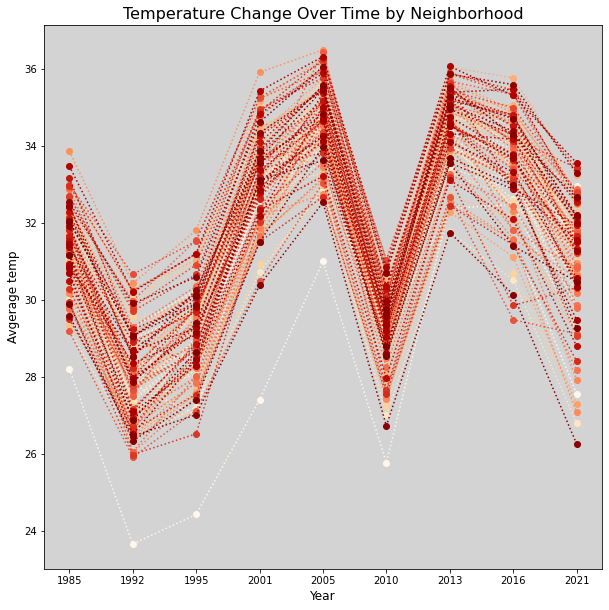

In [30]:
df = study_area.filter(['neighname','1985','1992','1995','2001',
          '2005','2010', '2013', '2016','2021'], axis=1)

df_2 = pd.DataFrame(df, columns = ['neighname','1985','1992','1995','2001',
          '2005','2010', '2013', '2016','2021']).set_index('neighname')

# create figure and axis
fig, ax = plt.subplots(figsize=(10, 10),)

# setting the axis' labels
ax.set_ylabel('Avgerage temp',fontsize=12)
ax.set_xlabel('Year',fontsize=12)


# transposing (switching rows and columns) of DataFrame df and
# plot a line for each column on the axis ax, which was created previously
P = df_2.T.plot(ax=ax, legend=False, linestyle=':',marker='o',cmap='OrRd')

P.set_facecolor('lightgrey')
plt.title('Temperature Change Over Time by Neighborhood', fontsize=16)


print(type(P))
#df

# Zoning and Permitted Impervious Cover

In [31]:
atx_code = gpd.read_file(r'C:\Users\molly\Project + Thesis Stuff\Zoning\Existing_Code_Reprojected.shp')
atx_code[['zoning_bas','zoning_zty']]

zoning_bas   zoning_zty
0            PUD          PUD
1             GR        GR-CO
2             SF         SF-2
3             CS  CS-MU-CO-NP
4             SF      SF-1-NP
...          ...          ...
22132         CS      CS-1-NP
22133        PUD          PUD
22134         GR           GR
22135          P            P
22136         CS        CS-NP

[22137 rows x 2 columns]

In [32]:
#ax = atx_code.plot('zoning_bas',figsize=(15,15), cmap= 'rainbow', legend=True)

<AxesSubplot:>

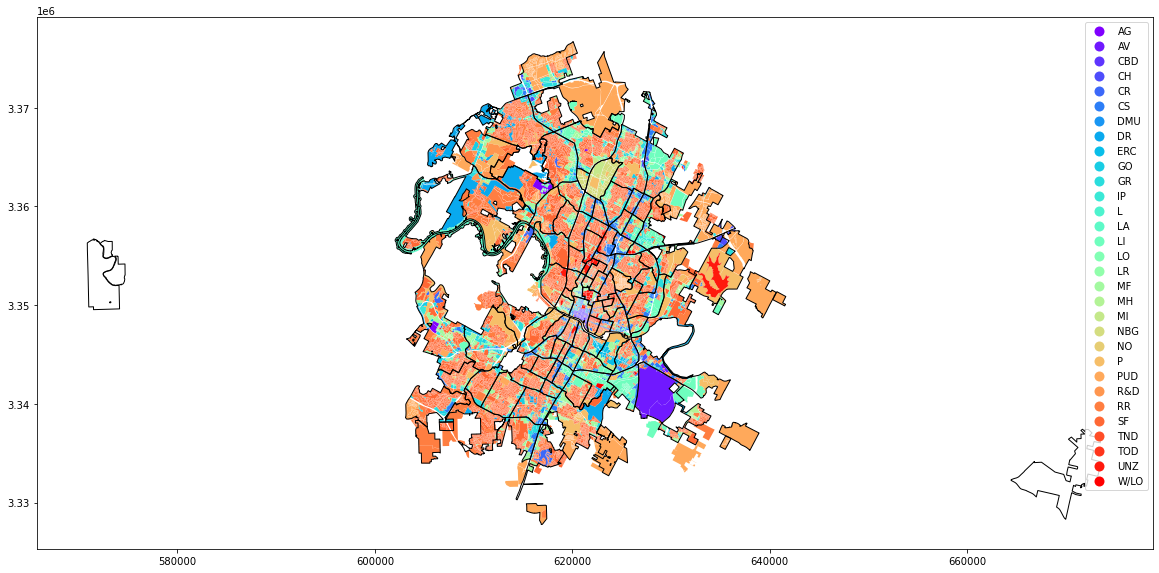

In [33]:
ax = atx_code.plot('zoning_bas',figsize=(20,20), cmap= 'rainbow', legend=True)
study_area.plot(ax=ax, facecolor = 'None', edgecolor = 'k')

# Group Classes by Range of Zoned Impervious Cover Allowance 

##checking to see if there will be null values (there are)
boolean_findings = atx_code['zoning_bas'].str.contains('MH')
print(boolean_findings)

total_occurence = boolean_findings.sum()  # Returns count of all boolean true.

if(total_occurence > 0):
    print("Yes the string is present in the column")

In [34]:
def get_val(s):
    if s is None:
        return -1
    D = {'RR':25,
        'SF-1': 40,
        'SF-3':45,
        'SF-2':45,
        'L':50,
        'R&D':50,
        'MF-1':55,
        'SF-6':55,
        'SF-5':55,
        'CR':60,
        'MF-2':60,
        'NO':60,
        'SF-4B':60,
        'MF-3':65,
       ' SF-4A':65,
        'LO':70,
        'MF-5':70,
        'MF-4':70,
        'W/LO':70,
        'GO':80,
        'IP':80,
        'LI':80,
        'MI':80,
        'MF-6':80,
        'LR':80,
        'CH':85,
        'GR': 90,
        'CS-1':85,
        'CS':95,
        'CBD':100,
        'DMU':100}
    for v in D.keys():
        if v in s: 
            return D[v]
    return -1
        

atx_code['Max Impervious Cover'] = list(map(get_val,atx_code['zoning_zty']))
atx_code[['Max Impervious Cover','zoning_zty']]


atx_code_cleaned = atx_code.drop(['created_by','date_creat', 'time_creat','modified_b','date_modif'], axis=1)




In [35]:
#atx_code_cleaned[:10].sort_values('Max Impervious Cover', ascending=False).copy()

##I also might could clean this data?

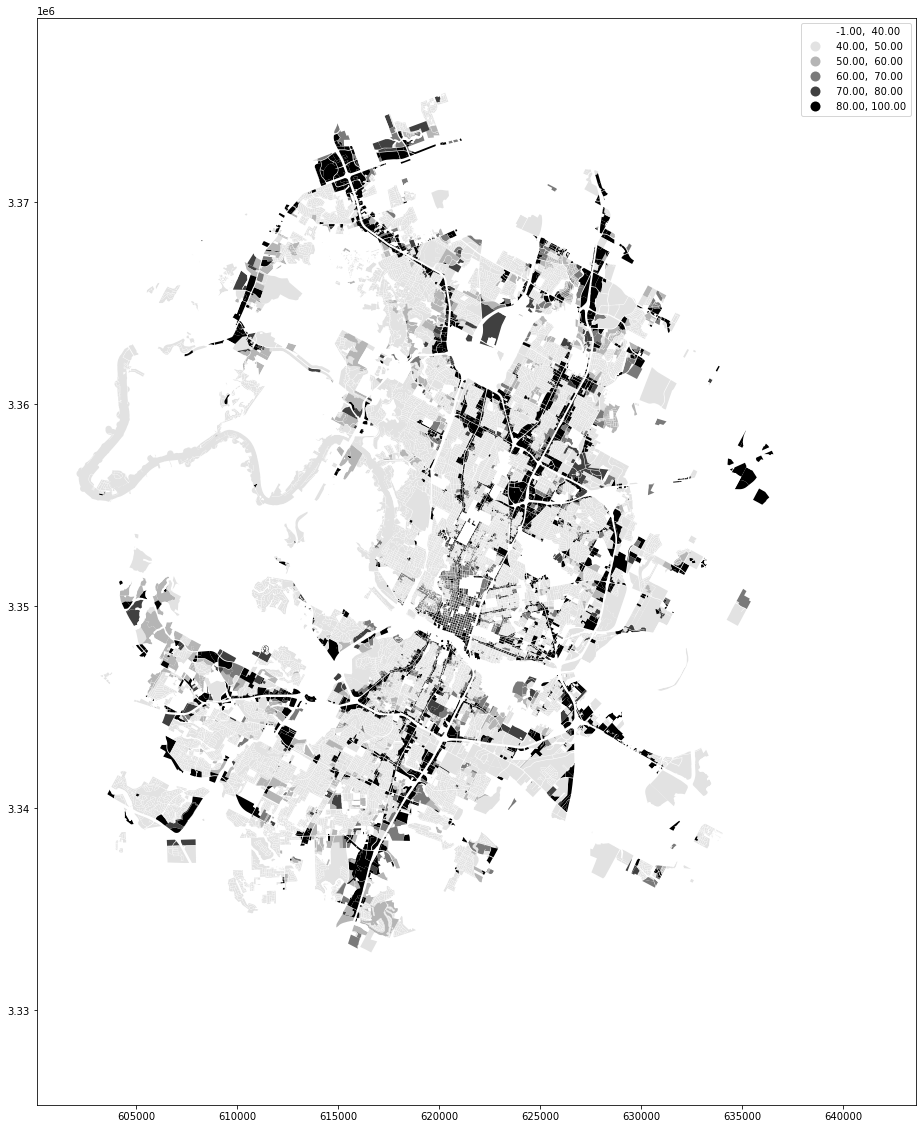

In [36]:
ax = atx_code_cleaned.plot('Max Impervious Cover', scheme='userdefined', classification_kwds=
                   {'bins':[40, 50, 60, 70, 80,100]},figsize=(20,20),cmap= 'Greys', legend=True)

#study_area.plot(ax=ax, facecolor = 'None', edgecolor = 'whitesmoke')





In [37]:
# select the columns that you with to use for the dissolve and that will be retained
code = atx_code_cleaned[['Max Impervious Cover', 'geometry']]

# dissolve the state boundary by region 
impervious_cover = code.dissolve(by='Max Impervious Cover')

# view the resulting geodataframe
impervious_cover

geometry
Max Impervious Cover                                                   
-1                    MULTIPOLYGON (((603370.763 3346564.170, 603340...
 25                   MULTIPOLYGON (((602872.814 3356298.386, 602881...
 40                   MULTIPOLYGON (((603251.026 3356831.127, 603237...
 45                   MULTIPOLYGON (((602836.596 3355807.136, 602834...
 50                   MULTIPOLYGON (((602897.304 3355828.212, 602908...
 55                   MULTIPOLYGON (((604871.502 3350400.894, 604870...
 60                   MULTIPOLYGON (((605452.948 3351079.627, 605443...
 65                   MULTIPOLYGON (((607303.053 3344614.637, 607304...
 70                   MULTIPOLYGON (((609291.537 3346845.321, 609296...
 80                   MULTIPOLYGON (((604779.138 3350017.271, 604828...
 85                   MULTIPOLYGON (((607628.960 3346124.160, 607616...
 90                   MULTIPOLYGON (((603356.004 3355553.762, 603338...
 95                   MULTIPOLYGON (((605156.808 3347558.042, 605157...
 100                  MULTIPOLYGON (((619826.095 3349191.986, 619834...

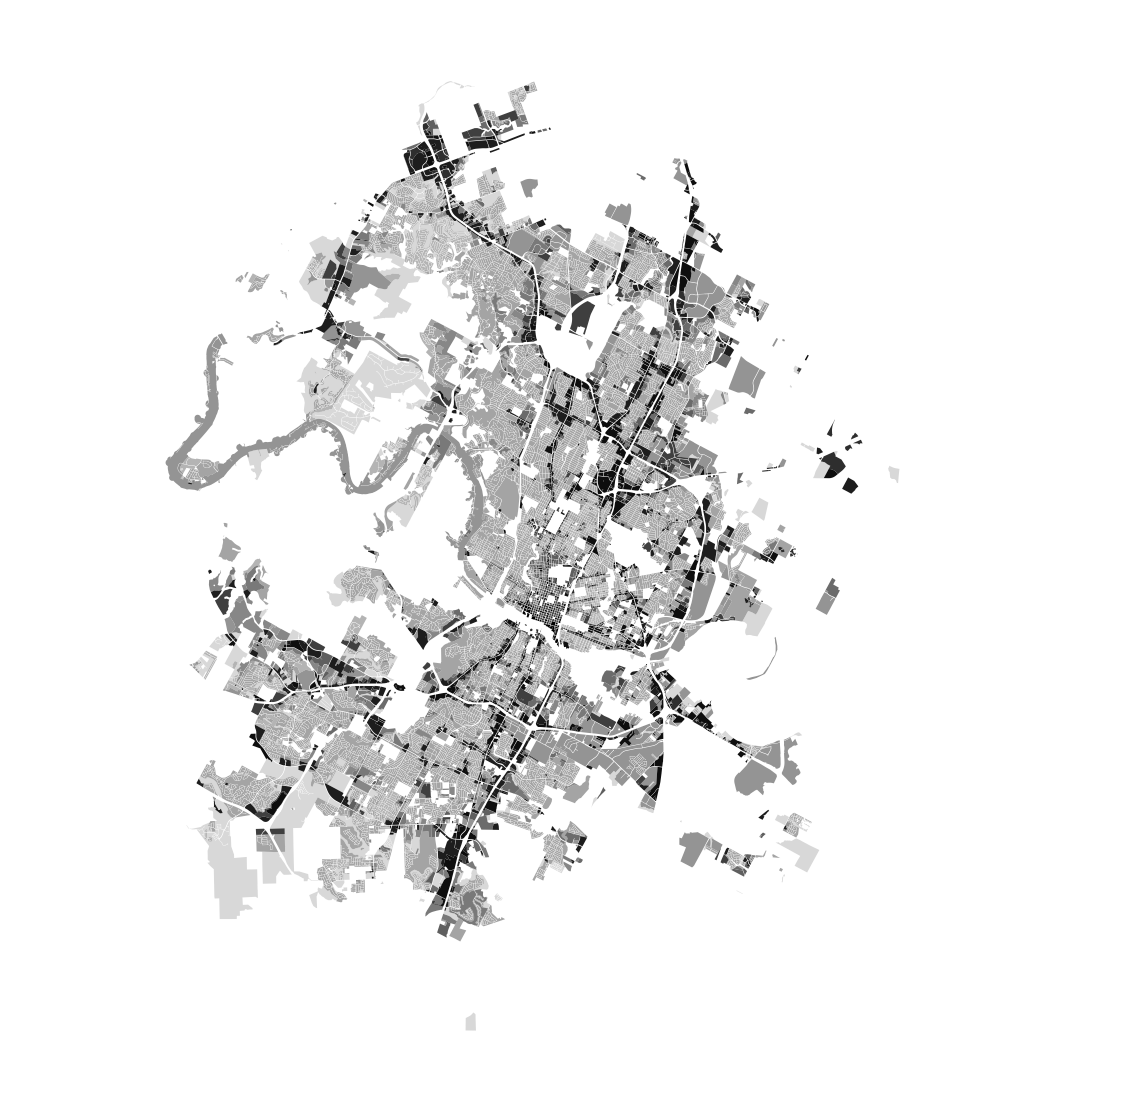

In [38]:
# create the plot
fig, ax = plt.subplots(figsize = (20,20))

# plot the data 
impervious_cover.reset_index().plot(column = 'Max Impervious Cover', ax=ax, cmap='Greys', label=True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');



scheme keys:
    (['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 
      'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled',
      'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])

# The Relationship Between Allowed Impervious Cover and Heat

Potetial way to join shapefiles?

we'll make a string column for the wKT geom
gdf['WKT'] = gdf['geometry'].apply(lambda x: str(x))

grouped_gdf = gdf.groupby('WKT').mean().reset_index()
result_gdf  = grouped_gdf[['WKT', 'your_column']]

then rebuild geometry from WKT
from shapely.wkt import loads

result_gdf['geometry'] = result_gdf['WKT'].apply(lambda x: loads(x))
result_gdf = geopandas.GeoDataFrame(result_gdf)

<AxesSubplot:>

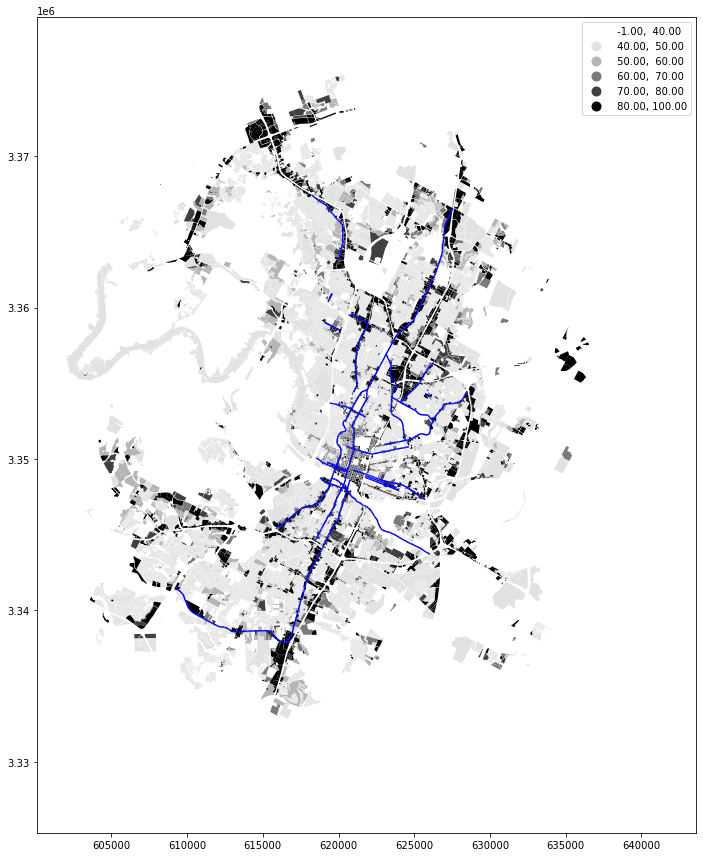

In [39]:
transit_corr = gpd.read_file(r'C:\Users\molly\Project + Thesis Stuff\Streets\core_transit_corridors_reprojected.shp')
#centerlines = gpd.read_file(r'C:\Users\molly\Project + Thesis Stuff\Streets\street_centerline_reprojected.shp')

ax = atx_code_cleaned.plot('Max Impervious Cover', scheme='userdefined', classification_kwds=
                   {'bins':[40, 50, 60, 70, 80,100]},figsize=(15,15), cmap= 'Greys', legend=True)

transit_corr.plot(ax=ax, facecolor = 'None',edgecolor = 'blue', linewidth=1.5)





'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 
'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Text(0.5, 1.0, '2021 Austin, TX Heat Map in C')

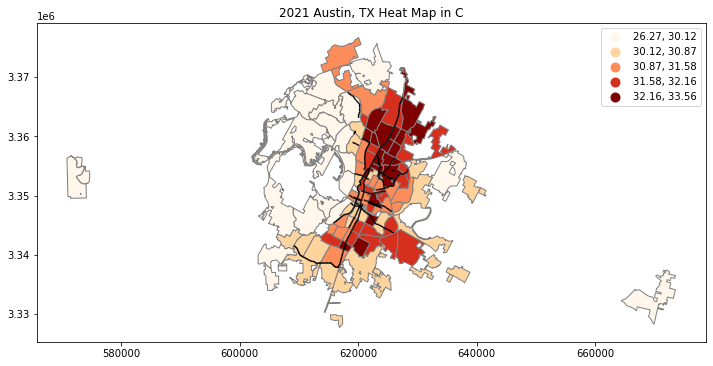

In [40]:
#overlay this on top of the heat chloropleth map.

study_area['2021']= df_2021['mean']

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
study_area.plot('2021',scheme='Quantiles', ax=ax, legend=True, cmap='OrRd',
               edgecolor='gray')
transit_corr.plot(ax=ax, facecolor = 'None', edgecolor = 'k')



plt.title('2021 Austin, TX Heat Map in C')




Would like to overlap 

must join the cholorpleth geodataframe with the zoning dataframe, display temperature and alloted impervious cover. Compare that to all years. Do they all reveal that these neighborhoods where ^ impervious surface cover is allowed are consistantly warmer? Now look at where the transit cooridors are. Demonstration of large amounts of concrete bringing up the local temperature. 

This analysis could be improved upon by doing a similar spatial analysis analyzing the heat surroundng major transit using a buffer method. 

In [41]:
heat = study_area[['geometry', 'neighname', '1985' ]]
heat.head()


geometry       neighname  \
0  POLYGON ((670574.750 3331012.500, 670327.750 3...      BASTROP SP   
1  MULTIPOLYGON (((573985.004 3354965.871, 574002...  PERDERNALES SP   
2  POLYGON ((615946.320 3370013.448, 616024.627 3...   ANDERSON MILL   
3  POLYGON ((627809.076 3353723.150, 627687.113 3...    WINDSOR PARK   
4  POLYGON ((619935.335 3345899.980, 619822.016 3...          DAWSON   

        1985  
0  28.213831  
1  31.472377  
2  31.250135  
3  31.933418  
4  31.493008

In [42]:
atx_code_cleaned.head()

time_modif  objectid     shape_area   shape_leng zoning_bas    zoning_id  \
0  16:09:41.000   17818.0  149213.287109  1733.709994        PUD  400463374.0   
1  14:40:09.000    1655.0  349676.857422  2385.601092         GR     123569.0   
2  00:00:00.000   11904.0  120321.251953  1444.391606         SF     223290.0   
3  14:40:03.000   14493.0   23143.453125   645.079498         CS     125367.0   
4  14:40:39.000    1942.0   82260.380859  1617.621405         SF     120680.0   

    zoning_zty                                           geometry  \
0          PUD  POLYGON ((633064.310 3357832.606, 633037.156 3...   
1        GR-CO  POLYGON ((616388.001 3369709.311, 616263.014 3...   
2         SF-2  POLYGON ((624727.717 3364948.814, 624726.590 3...   
3  CS-MU-CO-NP  POLYGON ((623599.125 3348367.014, 623582.632 3...   
4      SF-1-NP  POLYGON ((611304.468 3347934.821, 611333.745 3...   

   Max Impervious Cover  
0                    -1  
1                    90  
2                    45  
3                    95  
4                    40

In [43]:
import fiona
import shapely

In [44]:
g1 = heat
g2 = atx_code_cleaned
data = []
for index, heat in g1.iterrows():
    for index2, cover in g2.iterrows():
       if heat['geometry'].intersects(cover['geometry']):
          data.append({'geometry': heat['geometry'].intersection(cover['geometry']), 
                       'crime_stat':crim['crime_stat'], 'Population': popu['Population'],
                       'area':crim['geometry'].intersection(popu['geometry']).area})

df = gpd.GeoDataFrame(data,columns=['geometry', 'crime_stat', 'Population','area'])
df.to_file('intersection.shp')
# control of the results in mi case, first values
df.head() # image from a Jupiter/IPython notebook

ValueError: Null geometry supports no operations